In [11]:
import datetime
import numpy as np
import pandas as pd
from numpy import random as npr

from modules import utils

In [12]:
SEED = 2021
REAL_DATASET_SAMPLE_SIZE = 1
N_CHUNKS = 10 
npr.seed(SEED)

In [13]:
rating_df = pd.read_csv("data/rating.csv")
rating_df = rating_df.sample(frac=REAL_DATASET_SAMPLE_SIZE)
rating_df["rating"] = rating_df["rating"]
rating_df

,user_id,item_id,rating,timestamp
16334,128,49,1.0,977434870
440002,2689,3238,0.8,973344429
296395,1757,3243,0.4,974790728
170347,1084,699,0.6,974941318
281936,1690,1132,0.6,974775705
...,...,...,...,...
133741,864,2400,0.6,975281400
476288,2925,218,0.8,1006658564
923705,5576,3451,0.2,959289879
224597,1357,575,0.8,974769790


In [14]:
def evaluate(df):
    errors = {
        "svd": utils.evaluate_svd(df.copy(), rating_scale=(0, 1)),
        "knn": utils.evaluate_knn(df.copy(), rating_scale=(0, 1)),
        "autorec": utils.evaluate_autorec(df.copy())
    }
    return errors

In [15]:
%%time
npr.seed(SEED)
parts = np.array_split(rating_df, N_CHUNKS)
error_logs = []


for i, part in enumerate(parts):
    start = datetime.datetime.utcnow()    
    part = utils.map_idx_to_matrix_indices(part)
    error = evaluate(part)
    error_logs.append({"part": i, "error": error})
    duration = datetime.datetime.utcnow() - start
    print(f"Part {i} processed within {duration}")
    


RMSE: 0.2034
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.2028
Load data finished. Number of users: 5961 Number of items: 3317
IAutoRec.
Network built
Epoch: 0000; RMSE:0.3557560354221188; MAE:0.2926380952740239
Epoch: 0003; RMSE:0.2544000295487891; MAE:0.2014481150571234
Epoch: 0006; RMSE:0.22134307853460572; MAE:0.17632170814992879
Epoch: 0009; RMSE:0.21446423319551855; MAE:0.16925892045323646
Epoch: 0012; RMSE:0.21252561928271363; MAE:0.1676974658708786
Epoch: 0015; RMSE:0.21262729157340954; MAE:0.16787550011016528
Epoch: 0018; RMSE:0.21231311720377136; MAE:0.1680324005889436
Epoch: 0021; RMSE:0.21073623122113513; MAE:0.16615117648930985
Epoch: 0024; RMSE:0.21062521069115112; MAE:0.16624150656896383
Epoch: 0027; RMSE:0.21055066330355318; MAE:0.166222096080311
Epoch: 0030; RMSE:0.21085631859974452; MAE:0.16599047924655616
Epoch: 0033; RMSE:0.21049908421429597; MAE:0.1657673560960554
Epoch: 0036; RMSE:0.20995782193308962; MAE:0.16559683131032218
Epo

Epoch: 0387; RMSE:0.21989737734025178; MAE:0.17359647407071888
Epoch: 0390; RMSE:0.21953043901699182; MAE:0.1729818510155497
Epoch: 0393; RMSE:0.22045151841463537; MAE:0.17348635282812883
Epoch: 0396; RMSE:0.2202996156999199; MAE:0.17385754060456016
Epoch: 0399; RMSE:0.21937005278574642; MAE:0.17338611395740952
Epoch: 0402; RMSE:0.2200620667313303; MAE:0.17361478499602517
Epoch: 0405; RMSE:0.21794412804547778; MAE:0.1719911453335637
Epoch: 0408; RMSE:0.21835537168722782; MAE:0.1723158679599311
Epoch: 0411; RMSE:0.21913347266786593; MAE:0.17314025449204812
Epoch: 0414; RMSE:0.21833730910446544; MAE:0.1720878870807553
Epoch: 0417; RMSE:0.2202076155119833; MAE:0.1731920661099126
Epoch: 0420; RMSE:0.21746203929591285; MAE:0.17114421781933403
Epoch: 0423; RMSE:0.21846072589342558; MAE:0.172549870779778
Epoch: 0426; RMSE:0.21841945813970898; MAE:0.17203626970932087
Epoch: 0429; RMSE:0.21823797391668276; MAE:0.17169655327684163
Epoch: 0432; RMSE:0.21823930610006873; MAE:0.17187141181802204
Ep

Epoch: 0270; RMSE:0.2171509337849018; MAE:0.1714288044016429
Epoch: 0273; RMSE:0.21816884677299492; MAE:0.17183269816533192
Epoch: 0276; RMSE:0.2187573240900991; MAE:0.17240646363849332
Epoch: 0279; RMSE:0.21908826561551106; MAE:0.1725548463019839
Epoch: 0282; RMSE:0.2195077863163414; MAE:0.17370822960250268
Epoch: 0285; RMSE:0.2174102807234625; MAE:0.17083896139034666
Epoch: 0288; RMSE:0.2175136038208012; MAE:0.17098548427662796
Epoch: 0291; RMSE:0.2184080296879414; MAE:0.17220450347691324
Epoch: 0294; RMSE:0.2178282539954041; MAE:0.17128454983092442
Epoch: 0297; RMSE:0.21813689687089025; MAE:0.1719900776403567
Epoch: 0300; RMSE:0.2194373688369217; MAE:0.1729145546456812
Epoch: 0303; RMSE:0.2188773458812115; MAE:0.17211151832716795
Epoch: 0306; RMSE:0.21828487427376544; MAE:0.1718449004966401
Epoch: 0309; RMSE:0.21897565356610008; MAE:0.17282267558122658
Epoch: 0312; RMSE:0.2185417935180626; MAE:0.17205094503511914
Epoch: 0315; RMSE:0.21869526823275928; MAE:0.17231012710447038
Epoch: 

Epoch: 0153; RMSE:0.20879559882509865; MAE:0.16443945510585556
Epoch: 0156; RMSE:0.20958587473656196; MAE:0.16495203967470684
Epoch: 0159; RMSE:0.20930805411304063; MAE:0.16508426053169298
Epoch: 0162; RMSE:0.2102145579959863; MAE:0.16532375575248237
Epoch: 0165; RMSE:0.2082650650521981; MAE:0.16377910602757276
Epoch: 0168; RMSE:0.21050310381348536; MAE:0.1654447461243751
Epoch: 0171; RMSE:0.21041096875866672; MAE:0.16549739253492823
Epoch: 0174; RMSE:0.20987617739279532; MAE:0.16478614030814456
Epoch: 0177; RMSE:0.21098745828007373; MAE:0.16629436954967838
Epoch: 0180; RMSE:0.2100335758240717; MAE:0.1650839441254112
Epoch: 0183; RMSE:0.20977774702325838; MAE:0.16478774060528356
Epoch: 0186; RMSE:0.21011727870464858; MAE:0.1647107906504914
Epoch: 0189; RMSE:0.20986606703308902; MAE:0.16529001139115584
Epoch: 0192; RMSE:0.21013436395980256; MAE:0.1655839380002137
Epoch: 0195; RMSE:0.2099088206017923; MAE:0.16507943472148293
Epoch: 0198; RMSE:0.2095331971083524; MAE:0.1651822202214939
Ep

Epoch: 0078; RMSE:0.20941040881883796; MAE:0.16463547226818134
Epoch: 0081; RMSE:0.20992208548924035; MAE:0.1647899707990124
Epoch: 0084; RMSE:0.20929753031745998; MAE:0.16406176976320438
Epoch: 0087; RMSE:0.21071236795759427; MAE:0.16516278898087897
Epoch: 0090; RMSE:0.21036784865887945; MAE:0.16519604995312823
Epoch: 0093; RMSE:0.21096351829257265; MAE:0.16572746625108195
Epoch: 0096; RMSE:0.21105018608451262; MAE:0.16563563118193478
Epoch: 0099; RMSE:0.21115976281282547; MAE:0.1659380023283854
Epoch: 0102; RMSE:0.20939872307982163; MAE:0.16413041431577208
Epoch: 0105; RMSE:0.2115789197962627; MAE:0.16627699088731723
Epoch: 0108; RMSE:0.2107291139892244; MAE:0.16533967857175597
Epoch: 0111; RMSE:0.21112516089971298; MAE:0.16616820542792646
Epoch: 0114; RMSE:0.21054839316165497; MAE:0.16566526709128826
Epoch: 0117; RMSE:0.21139956319987133; MAE:0.16615176701286152
Epoch: 0120; RMSE:0.21060312413189403; MAE:0.16547090119354846
Epoch: 0123; RMSE:0.21199571937687667; MAE:0.16650833584036

Epoch: 0354; RMSE:0.2174298049711985; MAE:0.17138854299057174
Epoch: 0357; RMSE:0.21741296359075557; MAE:0.171256978937917
Epoch: 0360; RMSE:0.21945970437188161; MAE:0.17281080831266993
Epoch: 0363; RMSE:0.21992372083386905; MAE:0.1733844651127239
Epoch: 0366; RMSE:0.21775619875559296; MAE:0.17115036149259674
Epoch: 0369; RMSE:0.2173481116622077; MAE:0.17074122470003958
Epoch: 0372; RMSE:0.2170987653584515; MAE:0.17067910599689246
Epoch: 0375; RMSE:0.21837703529628438; MAE:0.17200319902801958
Epoch: 0378; RMSE:0.21873317869600156; MAE:0.1721254329526451
Epoch: 0381; RMSE:0.2173865162899664; MAE:0.1708006896759659
Epoch: 0384; RMSE:0.21857467294904223; MAE:0.17214281500812062
Epoch: 0387; RMSE:0.21924340435131084; MAE:0.17256053528577436
Epoch: 0390; RMSE:0.21908077859836134; MAE:0.17235869693743275
Epoch: 0393; RMSE:0.21861676404470798; MAE:0.17218443674666378
Epoch: 0396; RMSE:0.21975879205634763; MAE:0.17332402287044166
Epoch: 0399; RMSE:0.218313695730176; MAE:0.17178966677030055
Epo

Epoch: 0237; RMSE:0.21679067762595147; MAE:0.1702286941637119
Epoch: 0240; RMSE:0.21754595130735932; MAE:0.17075618069969514
Epoch: 0243; RMSE:0.21813198784667284; MAE:0.17203484445832246
Epoch: 0246; RMSE:0.2156265459912714; MAE:0.16961922097681484
Epoch: 0249; RMSE:0.2175140375381066; MAE:0.17009066089449998
Epoch: 0252; RMSE:0.21814893371494218; MAE:0.17103607349520678
Epoch: 0255; RMSE:0.21711568393298802; MAE:0.1706020260730736
Epoch: 0258; RMSE:0.2164459480441366; MAE:0.17020892341286148
Epoch: 0261; RMSE:0.21704925681145446; MAE:0.170503980318373
Epoch: 0264; RMSE:0.217166045939165; MAE:0.17049430303815144
Epoch: 0267; RMSE:0.2182659872193637; MAE:0.1713050700482198
Epoch: 0270; RMSE:0.21718042282899958; MAE:0.17049151772107865
Epoch: 0273; RMSE:0.21651247409474594; MAE:0.1698089853402941
Epoch: 0276; RMSE:0.2163328794694051; MAE:0.1699002007075113
Epoch: 0279; RMSE:0.2178104491089753; MAE:0.17072180644748006
Epoch: 0282; RMSE:0.21859976352557178; MAE:0.1708622009807808
Epoch: 0

Epoch: 0120; RMSE:0.2119597125959571; MAE:0.16587244307461577
Epoch: 0123; RMSE:0.21412717315222812; MAE:0.16712499650598714
Epoch: 0126; RMSE:0.21195928620151538; MAE:0.16590297563762166
Epoch: 0129; RMSE:0.21300477429568468; MAE:0.16670098877010314
Epoch: 0132; RMSE:0.21260977477041054; MAE:0.1671841451997535
Epoch: 0135; RMSE:0.21265673713365754; MAE:0.1664590634429336
Epoch: 0138; RMSE:0.21370058993471674; MAE:0.1668788785069153
Epoch: 0141; RMSE:0.21416428234515494; MAE:0.16788873531993448
Epoch: 0144; RMSE:0.21263136849823383; MAE:0.166770298774381
Epoch: 0147; RMSE:0.21159978941403587; MAE:0.1663321297798507
Epoch: 0150; RMSE:0.21338959317511733; MAE:0.1675152379380612
Epoch: 0153; RMSE:0.21316050504938758; MAE:0.16734747491775068
Epoch: 0156; RMSE:0.21394587740933946; MAE:0.16808958927412745
Epoch: 0159; RMSE:0.21252018816492077; MAE:0.1667655258472043
Epoch: 0162; RMSE:0.21353171442505794; MAE:0.1678180959570509
Epoch: 0165; RMSE:0.21427970134078297; MAE:0.1683094392150539
Epo

Epoch: 0003; RMSE:0.25559132900829623; MAE:0.2003560752613937
Epoch: 0006; RMSE:0.21884498056406895; MAE:0.17267760434069654
Epoch: 0009; RMSE:0.21216000830610657; MAE:0.16683090731917444
Epoch: 0012; RMSE:0.21026039395705423; MAE:0.16562528293898449
Epoch: 0015; RMSE:0.21049549540341428; MAE:0.16522765861613908
Epoch: 0018; RMSE:0.2096818403484495; MAE:0.16472375054833746
Epoch: 0021; RMSE:0.2094322885876875; MAE:0.16465171476631135
Epoch: 0024; RMSE:0.20954477234416716; MAE:0.16456367861542226
Epoch: 0027; RMSE:0.20940531383013997; MAE:0.16414010628359976
Epoch: 0030; RMSE:0.21023698002140545; MAE:0.16533400856092484
Epoch: 0033; RMSE:0.2099606144569116; MAE:0.16506498583872423
Epoch: 0036; RMSE:0.21033978306064846; MAE:0.16481552375012182
Epoch: 0039; RMSE:0.20876424175065436; MAE:0.1642244081123416
Epoch: 0042; RMSE:0.2082108661794644; MAE:0.16358435226790569
Epoch: 0045; RMSE:0.20896716902545381; MAE:0.16397491216730598
Epoch: 0048; RMSE:0.2090320659295466; MAE:0.1641869182761566


Epoch: 0399; RMSE:0.21726244700770272; MAE:0.1716395772804647
Epoch: 0402; RMSE:0.21839550950502873; MAE:0.17261280153407388
Epoch: 0405; RMSE:0.2173301864233686; MAE:0.17149335563340126
Epoch: 0408; RMSE:0.21649031110603764; MAE:0.17055031756786154
Epoch: 0411; RMSE:0.21747237670417902; MAE:0.17157541775788027
Epoch: 0414; RMSE:0.2177667337625914; MAE:0.17180083728132173
Epoch: 0417; RMSE:0.21896084794945958; MAE:0.17326194851844479
Epoch: 0420; RMSE:0.21921067934584698; MAE:0.1728204139432407
Epoch: 0423; RMSE:0.21923851735476857; MAE:0.17285235235130594
Epoch: 0426; RMSE:0.21908819914924116; MAE:0.17276070613097408
Epoch: 0429; RMSE:0.22003646125009677; MAE:0.17464212189540484
Epoch: 0432; RMSE:0.21778300051819569; MAE:0.17179913806490654
Epoch: 0435; RMSE:0.21945396408412116; MAE:0.1732973595506984
Epoch: 0438; RMSE:0.21932295726349657; MAE:0.1734909849803169
Epoch: 0441; RMSE:0.21657215088218934; MAE:0.17098369335929434
Epoch: 0444; RMSE:0.2170265832797704; MAE:0.17129826907584222

Epoch: 0282; RMSE:0.2144541379855073; MAE:0.16816505066505663
Epoch: 0285; RMSE:0.21628512718273388; MAE:0.17006842765456198
Epoch: 0288; RMSE:0.21565093259895973; MAE:0.16927863654736866
Epoch: 0291; RMSE:0.2156815081729165; MAE:0.16916406983823082
Epoch: 0294; RMSE:0.2168618770498563; MAE:0.16983798532492328
Epoch: 0297; RMSE:0.2152909603928834; MAE:0.16863757307919383
Epoch: 0300; RMSE:0.21424780900196286; MAE:0.16786681852914656
Epoch: 0303; RMSE:0.21553701804012895; MAE:0.16907578631460066
Epoch: 0306; RMSE:0.2153886894996554; MAE:0.16847697069100356
Epoch: 0309; RMSE:0.2170600099667459; MAE:0.1701078629372249
Epoch: 0312; RMSE:0.2153346518872411; MAE:0.16904175658241125
Epoch: 0315; RMSE:0.21691729910202434; MAE:0.1702650966174641
Epoch: 0318; RMSE:0.21627886365175938; MAE:0.16998716298776967
Epoch: 0321; RMSE:0.21549210533753357; MAE:0.1691233030985642
Epoch: 0324; RMSE:0.21584500411691418; MAE:0.16895669108794914
Epoch: 0327; RMSE:0.21533758397082836; MAE:0.1685488687274403
Epo

Epoch: 0165; RMSE:0.21812301881670373; MAE:0.17028738791862447
Epoch: 0168; RMSE:0.21740903228172687; MAE:0.16985884025763645
Epoch: 0171; RMSE:0.21717747204437707; MAE:0.16935160793184545
Epoch: 0174; RMSE:0.21685889481882664; MAE:0.16963072735400125
Epoch: 0177; RMSE:0.21661971317553275; MAE:0.16908840621360585
Epoch: 0180; RMSE:0.21633829413624817; MAE:0.16825829456494198
Epoch: 0183; RMSE:0.21833779888495652; MAE:0.17103390375747662
Epoch: 0186; RMSE:0.21730460709844224; MAE:0.16956077139522002
Epoch: 0189; RMSE:0.21725637367706127; MAE:0.169447694138835
Epoch: 0192; RMSE:0.21915038557824776; MAE:0.1712069143269086
Epoch: 0195; RMSE:0.21908836758014733; MAE:0.17091464470867035
Epoch: 0198; RMSE:0.21806183470794427; MAE:0.17017636315771895
Epoch: 0201; RMSE:0.21722440975999008; MAE:0.16986827965449947
Epoch: 0204; RMSE:0.2169199799499882; MAE:0.16899550130866173
Epoch: 0207; RMSE:0.2200129263288446; MAE:0.17103517968762244
Epoch: 0210; RMSE:0.21887378478308472; MAE:0.170337299879381

In [22]:
[len(p) for p in parts]

[100021,
 100021,
 100021,
 100021,
 100021,
 100021,
 100021,
 100021,
 100021,
 100020]

In [16]:
error_logs

[{'part': 0,
  'error': {'svd': 0.2034393327753146,
   'knn': 0.20275939337254664,
   'autorec': 0.2075324097101398}},
 {'part': 1,
  'error': {'svd': 0.20597214539502454,
   'knn': 0.20337128613459396,
   'autorec': 0.2090290760770514}},
 {'part': 2,
  'error': {'svd': 0.20290390531572247,
   'knn': 0.20538933898129122,
   'autorec': 0.20431937574697365}},
 {'part': 3,
  'error': {'svd': 0.20346423025484195,
   'knn': 0.20447463900582796,
   'autorec': 0.2086422503987358}},
 {'part': 4,
  'error': {'svd': 0.20553369788066125,
   'knn': 0.20358909708789613,
   'autorec': 0.2069314656342664}},
 {'part': 5,
  'error': {'svd': 0.20332681918362688,
   'knn': 0.20696926899107565,
   'autorec': 0.209590497976603}},
 {'part': 6,
  'error': {'svd': 0.20210252838499967,
   'knn': 0.20356700116855572,
   'autorec': 0.20895145476053878}},
 {'part': 7,
  'error': {'svd': 0.2023795251868334,
   'knn': 0.20455975381214875,
   'autorec': 0.20642908935277687}},
 {'part': 8,
  'error': {'svd': 0.204394

In [17]:
errors = []
for e in error_logs:
    for k, v in e["error"].items():
        errors.append({"part": e["part"], "error": v, "model": k})
    

In [18]:
error_df = pd.DataFrame(errors)
error_df

,part,error,model
0,0,0.203439,svd
1,0,0.202759,knn
2,0,0.207532,autorec
3,1,0.205972,svd
4,1,0.203371,knn
5,1,0.209029,autorec
6,2,0.202904,svd
7,2,0.205389,knn
8,2,0.204319,autorec
9,3,0.203464,svd


In [19]:
error_df.to_csv("./cache/find_best_chunks_results_5_parts.csv", index=False)

<AxesSubplot:xlabel='part', ylabel='error'>

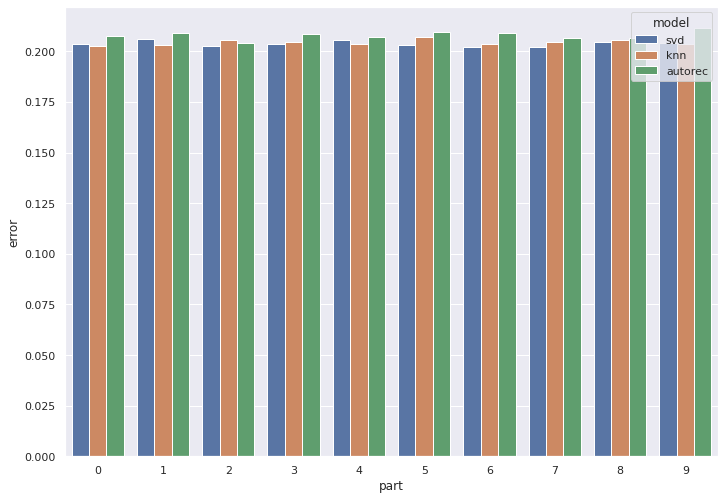

In [21]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=error_df, x="part", y="error", hue="model")